In [1]:
using Plots
using JLD
using Statistics

In [3]:
# WARNING THIS STEP IS SLOW

# runSimulation()

In [2]:
oneSidedResults = load("../FactorialSimulationOneSided.jld")["results"]
twoSidedResults = load("../FactorialSimulationTwoSided.jld")["results"]

4×11×4×3×4×3×5 Array{Float64, 7}:
[:, :, 1, 1, 1, 1, 1] =
 0.694724  0.631878  0.723262  0.679499  …  0.751866  0.725115   0.712597
 0.73697   0.621773  0.706539  0.652038     0.65631   0.623085   0.602081
 0.507108  0.462917  0.688403  0.69293      0.809851  0.802896   0.802849
 0.696375  0.60045   0.665985  0.566443     0.428161  0.222265  -0.00393148

[:, :, 2, 1, 1, 1, 1] =
 0.741573  0.635628  0.634543  0.643057  …  0.64987   0.654375  0.655999
 0.774174  0.634401  0.631906  0.639609     0.638646  0.645339  0.644493
 0.576836  0.480423  0.609278  0.681269     0.800092  0.814713  0.823639
 0.741708  0.632697  0.627887  0.632866     0.621221  0.621915  0.619921

[:, :, 3, 1, 1, 1, 1] =
 0.725532  0.639194  0.639021  0.643187  …  0.64278   0.641786  0.642073
 0.76313   0.639069  0.638578  0.64238      0.640737  0.639112  0.639124
 0.556281  0.487609  0.615985  0.684358     0.801467  0.811643  0.820914
 0.725561  0.638616  0.637718  0.641182     0.637151  0.635416  0.634976

[:, :, 4,

In [6]:
#Mean over all but one attribute

function meanOverAllButOneIndex(index::Integer, arr::AbstractArray)
    averageOverIndices = (setdiff(2:length(size(arr)), index)...,)
    meanArray = mean(arr, dims=averageOverIndices)
    reshaped = dropdims(meanArray, dims=averageOverIndices)
    return reshaped
end

oneSidedNumClusters     = meanOverAllButOneIndex(2, oneSidedResults)
oneSidedNumObservations = meanOverAllButOneIndex(3, oneSidedResults)
oneSidedImbalance       = meanOverAllButOneIndex(4, oneSidedResults)
oneSidedPrecision       = meanOverAllButOneIndex(5, oneSidedResults)
oneSidedRandomizeRate   = meanOverAllButOneIndex(6, oneSidedResults)

twoSidedNumClusters     = meanOverAllButOneIndex(2, twoSidedResults)
twoSidedNumObservations = meanOverAllButOneIndex(3, twoSidedResults)
twoSidedImbalance       = meanOverAllButOneIndex(4, twoSidedResults)
twoSidedPrecision       = meanOverAllButOneIndex(5, twoSidedResults)
twoSidedRandomizeRate   = meanOverAllButOneIndex(6, twoSidedResults)

4×3 Matrix{Float64}:
 0.659083   0.147858   0.0919204
 0.401447  -0.516322  -0.971001
 0.530125  -0.17696   -0.577889
 0.625629   0.182224   2.91703e-5

# Two Sided Comparisons

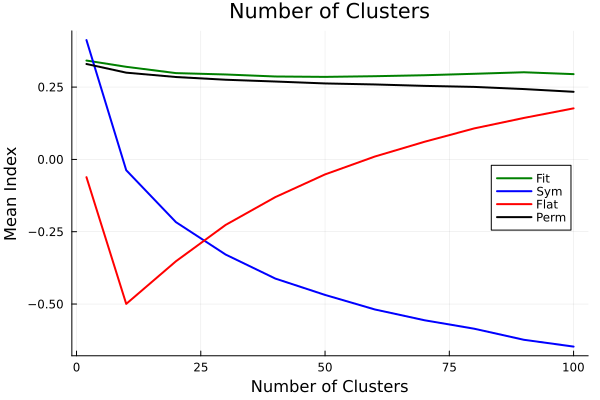

In [66]:
numClusters = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plot(numClusters, twoSidedNumClusters[1, :],  label="Fit", linewidth=2, linecolor=:green, legend=:right)
plot!(numClusters, twoSidedNumClusters[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(numClusters, twoSidedNumClusters[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(numClusters, twoSidedNumClusters[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Number of Clusters")
xlabel!("Number of Clusters")
ylabel!("Mean Index")
#savefig("FactorialTwoSideNumberClusters.png")

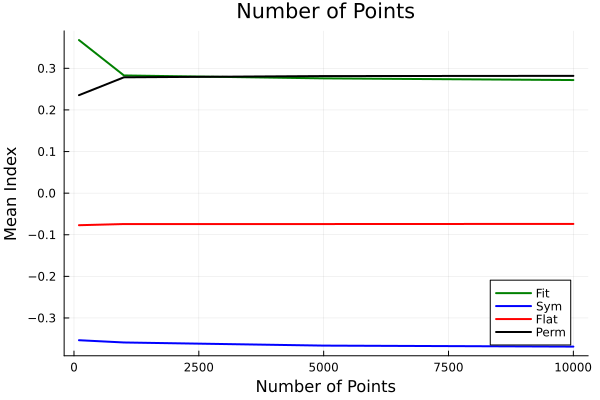

In [67]:
numObservations = [100, 1000, 5000, 10000]
plot(numObservations, twoSidedNumObservations[1, :], label="Fit", linewidth=2, linecolor=:green, legend=:bottomright)
plot!(numObservations, twoSidedNumObservations[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(numObservations, twoSidedNumObservations[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(numObservations, twoSidedNumObservations[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Number of Points")
xlabel!("Number of Points")
ylabel!("Mean Index")
#savefig("FactorialTwoSideNumberPoints.png")

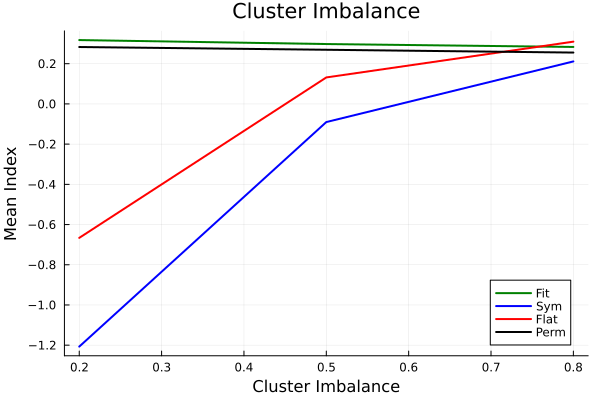

In [68]:
clusterImbalance = [0.8, 0.5, 0.2]
plot(clusterImbalance, twoSidedImbalance[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(clusterImbalance, twoSidedImbalance[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(clusterImbalance, twoSidedImbalance[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(clusterImbalance, twoSidedImbalance[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Cluster Imbalance")
xlabel!("Cluster Imbalance")
ylabel!("Mean Index")
#savefig("FactorialTwoSideClusterImbalance.png")

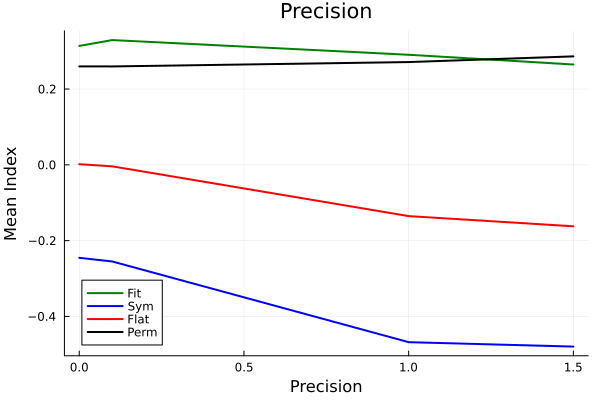

In [69]:
precision = [0, 0.1, 1, 1.5]
plot(precision, twoSidedPrecision[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(precision, twoSidedPrecision[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(precision, twoSidedPrecision[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(precision, twoSidedPrecision[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Precision")
xlabel!("Precision")
ylabel!("Mean Index")
#savefig("FactorialTwoSidePrecision.png")

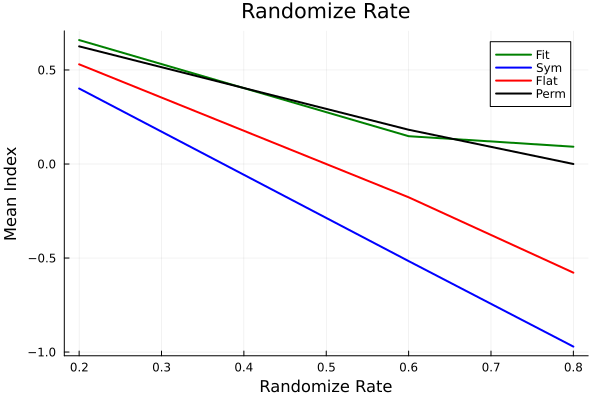

In [70]:
randomizeRates = [0.2, 0.6, 0.8]
plot(randomizeRates, twoSidedRandomizeRate[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(randomizeRates,twoSidedRandomizeRate[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(randomizeRates,twoSidedRandomizeRate[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(randomizeRates,twoSidedRandomizeRate[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Randomize Rate")
xlabel!("Randomize Rate")
ylabel!("Mean Index")
#savefig("FactorialTwoSideRandomizeRate.png")

## Maximum Fit / Perm Disagreement

In [23]:
diff = [
    abs.(twoSidedNumClusters[1, :] - twoSidedNumClusters[4, :]),
    abs.(twoSidedNumObservations[1, :] - twoSidedNumObservations[4, :]),
    abs.(twoSidedImbalance[1, :] - twoSidedImbalance[4, :]),
    abs.(twoSidedPrecision[1, :] - twoSidedPrecision[4, :]),
    abs.(twoSidedRandomizeRate[1, :] - twoSidedRandomizeRate[4, :])
]
maximum(maximum(diff))

0.13247507634043298

# One Sided Comparison

In [21]:
numClusters = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plot(numClusters, oneSidedNumClusters[1, :],  label="Fit", linewidth=2, linecolor=:green, legend=:right)
plot!(numClusters, oneSidedNumClusters[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(numClusters, oneSidedNumClusters[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(numClusters, oneSidedNumClusters[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Number of Clusters")
xlabel!("Number of Clusters")
ylabel!("Mean Index")
#savefig("FactorialOneSideNumberClusters.png")

"/Users/ryandewolfe/FuzzyClusteringSimilarity/FactorialSimulation/FactorialOneSideNumberClusters.png"

In [22]:
numObservations = [100, 1000, 5000, 10000]
plot(numObservations, oneSidedNumObservations[1, :], label="Fit", linewidth=2, linecolor=:green, legend=:bottomright)
plot!(numObservations, oneSidedNumObservations[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(numObservations, oneSidedNumObservations[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(numObservations, oneSidedNumObservations[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Number of Points")
xlabel!("Number of Points")
ylabel!("Mean Index")
#savefig("FactorialOneSideNumberPoints.png")

"/Users/ryandewolfe/FuzzyClusteringSimilarity/FactorialSimulation/FactorialOneSideNumberPoints.png"

In [23]:
clusterImbalance = [0.8, 0.5, 0.2]
plot(clusterImbalance, oneSidedImbalance[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(clusterImbalance, oneSidedImbalance[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(clusterImbalance, oneSidedImbalance[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(clusterImbalance, oneSidedImbalance[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Cluster Imbalance")
xlabel!("Cluster Imbalance")
ylabel!("Mean Index")
#savefig("FactorialOneSideClusterImbalance.png")

"/Users/ryandewolfe/FuzzyClusteringSimilarity/FactorialSimulation/FactorialOneSideClusterImbalance.png"

In [24]:
precision = [0, 0.1, 1, 1.5]
plot(precision, oneSidedPrecision[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(precision, oneSidedPrecision[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(precision, oneSidedPrecision[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(precision, oneSidedPrecision[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Precision")
xlabel!("Precision")
ylabel!("Mean Index")
#savefig("FactorialOneSidePrecision.png")

"/Users/ryandewolfe/FuzzyClusteringSimilarity/FactorialSimulation/FactorialOneSidePrecision.png"

In [25]:
randomizeRates = [0.2, 0.6, 0.8]
plot(randomizeRates, oneSidedRandomizeRate[1, :], label="Fit", linewidth=2, linecolor=:green)
plot!(randomizeRates,oneSidedRandomizeRate[2, :], label="Sym", linewidth=2, linecolor=:blue)
plot!(randomizeRates,oneSidedRandomizeRate[3, :], label="Flat", linewidth=2, linecolor=:red)
plot!(randomizeRates,oneSidedRandomizeRate[4, :], label="Perm", linewidth=2, linecolor=:black)
title!("Randomize Rate")
xlabel!("Randomize Rate")
ylabel!("Mean Index")
#savefig("FactorialOneSideRandomizeRate.png")

"/Users/ryandewolfe/FuzzyClusteringSimilarity/FactorialSimulation/FactorialOneSideRandomizeRate.png"

In [27]:
diff = [
    abs.(oneSidedNumClusters[1, :] - oneSidedNumClusters[4, :]),
    abs.(oneSidedNumObservations[1, :] - oneSidedNumObservations[4, :]),
    abs.(oneSidedImbalance[1, :] - oneSidedImbalance[4, :]),
    abs.(oneSidedPrecision[1, :] - oneSidedPrecision[4, :])
    #abs.(oneSidedRandomizeRate[1, :] - oneSidedRandomizeRate[4, :])
]
maximum(maximum(diff))

NaN

In [32]:
findall(isnan, oneSidedResults)

14-element Vector{CartesianIndex{7}}:
 CartesianIndex(1, 4, 1, 2, 2, 3, 1)
 CartesianIndex(1, 3, 2, 2, 2, 3, 1)
 CartesianIndex(1, 5, 3, 3, 2, 3, 1)
 CartesianIndex(1, 4, 4, 3, 2, 3, 1)
 CartesianIndex(1, 4, 1, 2, 2, 3, 2)
 CartesianIndex(1, 8, 1, 3, 2, 3, 2)
 CartesianIndex(1, 3, 1, 1, 2, 3, 3)
 CartesianIndex(1, 5, 3, 3, 2, 3, 3)
 CartesianIndex(1, 3, 1, 1, 2, 3, 4)
 CartesianIndex(1, 4, 1, 2, 2, 3, 4)
 CartesianIndex(1, 9, 1, 3, 2, 3, 4)
 CartesianIndex(1, 3, 1, 1, 2, 3, 5)
 CartesianIndex(1, 7, 1, 3, 2, 3, 5)
 CartesianIndex(1, 11, 3, 1, 3, 3, 5)